<a href="https://colab.research.google.com/github/seiji0203/LSTM_-/blob/master/LSTM_%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 意思決定のためのデータ分析分析

In [98]:
!pip install pandas_datareader

In [99]:
# モジュールのインポート
import numpy as np
import pandas as pd
import pandas_datareader.data as data
from matplotlib import pyplot as plt
%matplotlib inline

# 週を追加
from datetime import datetime
from datetime import timedelta

# 標準化関数（StandardScaler）をインポート
from sklearn.preprocessing import StandardScaler

# LSTM
!pip install tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

# 混同行列生成のための混同行列生成のためのconfusion_matrixをインポート
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [100]:
start = '2019-06-01'
end = '2020-06-01'

df = data.DataReader('^NKX', 'stooq', start, end)
df.to_csv('finance_datasets.csv')

In [101]:
# データの確認
df = pd.read_csv('finance_datasets.csv')
df

,Date,Open,High,Low,Close,Volume
0,2020-06-01,21910.89,22161.39,21898.99,22062.39,721657900
1,2020-05-29,21811.52,21955.44,21710.80,21877.89,1531900700
2,2020-05-28,21612.90,21917.43,21580.50,21916.31,1340312400
3,2020-05-27,21249.31,21473.68,21143.37,21419.23,1120168200
4,2020-05-26,20927.96,21327.86,20918.11,21271.17,871911300
5,2020-05-25,20653.41,20741.65,20584.06,20741.65,550881700
6,2020-05-22,20583.95,20615.12,20335.15,20388.16,711488200
7,2020-05-21,20692.59,20733.33,20505.42,20552.31,628629000
8,2020-05-20,20454.49,20684.46,20454.49,20595.15,717576200
9,2020-05-19,20469.52,20659.46,20433.45,20433.45,929846900


In [102]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [103]:
# Dateデータがobject型なので、datatime64型へ変更（利便性が高いため）
df['Date'] = pd.to_datetime(df['Date'])
df.info()

# データの並び替え（sort_valuesで日付順に並び替えを行う）
df.sort_values(by='Date', ascending=True, inplace=True)

# 日付のDateをインデックスにセット（今回のような時系列データを処理する際はset_indexを使用して日付をインデックスに設定）
df.set_index(keys="Date", inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    242 non-null    datetime64[ns]
 1   Open    242 non-null    float64       
 2   High    242 non-null    float64       
 3   Low     242 non-null    float64       
 4   Close   242 non-null    float64       
 5   Volume  242 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.5 KB


,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,20327.87,20438.03,20305.74,20410.88,695247100
2019-06-04,20435.86,20464.57,20290.16,20408.54,713001500
2019-06-05,20667.89,20800.64,20646.15,20776.10,744705100
2019-06-06,20745.84,20842.28,20745.84,20774.04,614232500
2019-06-07,20859.78,20907.06,20817.07,20884.71,522701300
2019-06-10,21095.40,21166.04,21077.95,21134.42,599681500
2019-06-11,21099.54,21226.64,21066.62,21204.28,536723100
2019-06-12,21130.39,21259.49,21118.75,21129.72,582359200
2019-06-13,21040.91,21111.05,20932.74,21032.00,677076800


In [104]:
date = df.index
price = df['Close']

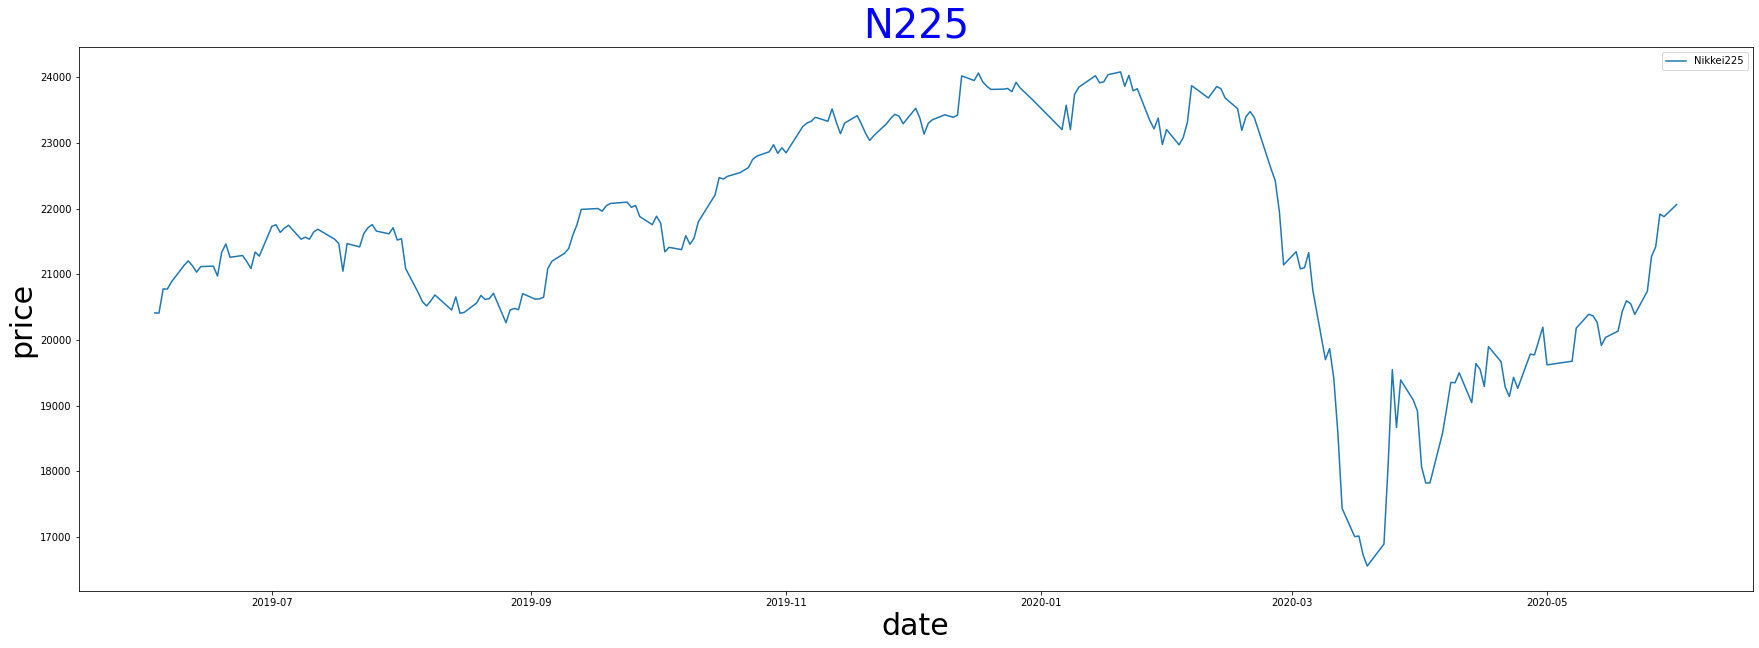

In [105]:
# 細かく表示する
plt.figure(figsize=(30,10))
plt.plot(date, price, label='Nikkei225')
plt.title('N225', color="blue", size=40, loc='center')
plt.xlabel('date', color='black', size=30)
plt.ylabel('price', color='black', size=30)
plt.legend()

In [106]:
# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df['sma5'] = price.rolling(window=span5).mean()
df['sma25'] = price.rolling(window=span25).mean()
df['sma50'] = price.rolling(window=span50).mean()

In [107]:
pd.set_option('display.max_rows', None)
df.head(100)

,Open,High,Low,Close,Volume,sma5,sma25,sma50
Date,,,,,,,,
2019-06-03,20327.87,20438.03,20305.74,20410.88,695247100,NaN,NaN,NaN
2019-06-04,20435.86,20464.57,20290.16,20408.54,713001500,NaN,NaN,NaN
2019-06-05,20667.89,20800.64,20646.15,20776.10,744705100,NaN,NaN,NaN
2019-06-06,20745.84,20842.28,20745.84,20774.04,614232500,NaN,NaN,NaN
2019-06-07,20859.78,20907.06,20817.07,20884.71,522701300,20650.854,NaN,NaN
2019-06-10,21095.40,21166.04,21077.95,21134.42,599681500,20795.562,NaN,NaN
2019-06-11,21099.54,21226.64,21066.62,21204.28,536723100,20954.710,NaN,NaN
2019-06-12,21130.39,21259.49,21118.75,21129.72,582359200,21025.434,NaN,NaN
2019-06-13,21040.91,21111.05,20932.74,21032.00,677076800,21077.026,NaN,NaN


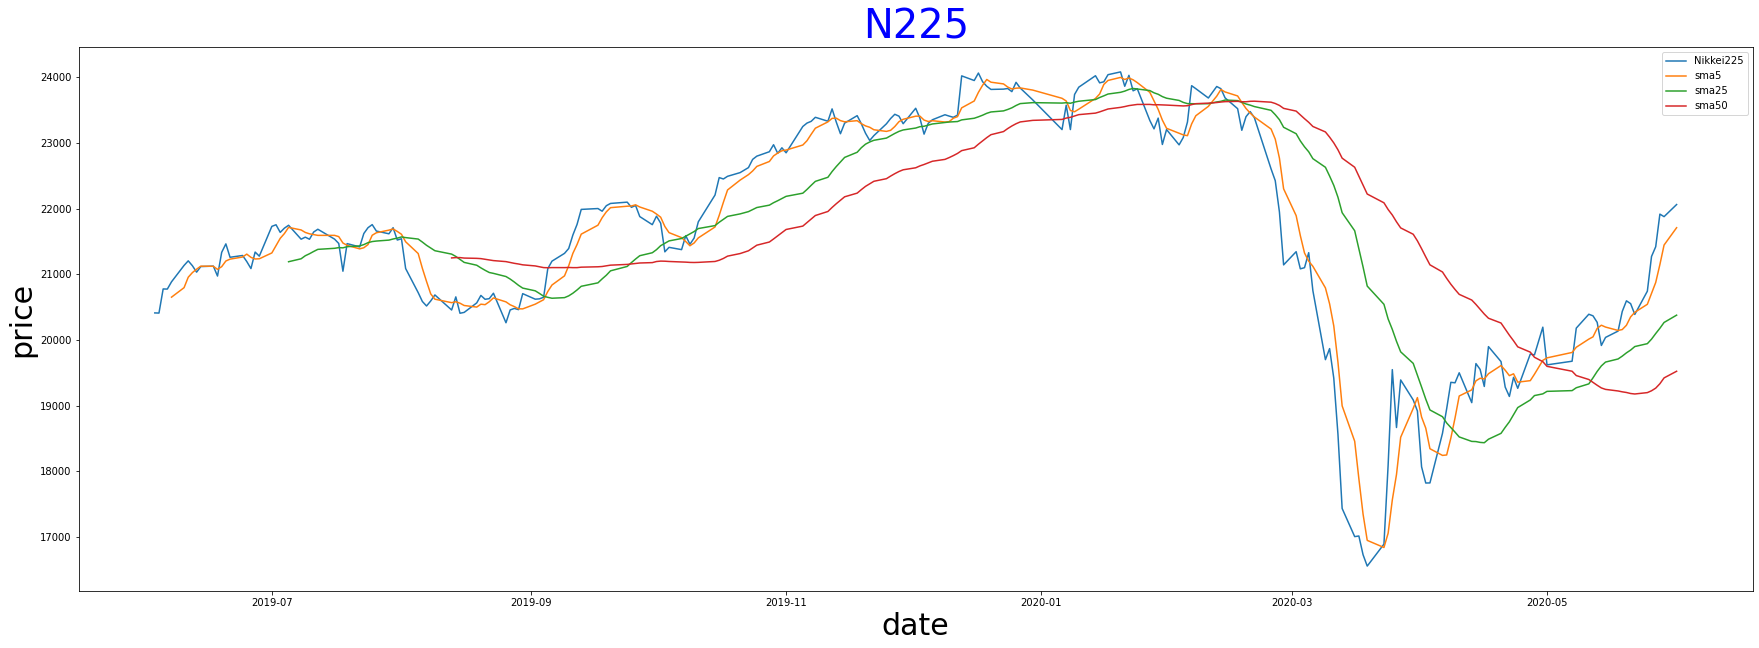

In [108]:
plt.figure(figsize=(30, 10))
plt.plot(date, price, label = 'Nikkei225')
plt.plot(date, df['sma5'], label='sma5')
plt.plot(date, df['sma25'], label='sma25')
plt.plot(date, df['sma50'], label='sma50')

plt.title('N225', color='blue', size=40, loc='center')
plt.xlabel('date', color='black', size=30)
plt.ylabel('price', color='black', size=30)

plt.legend()

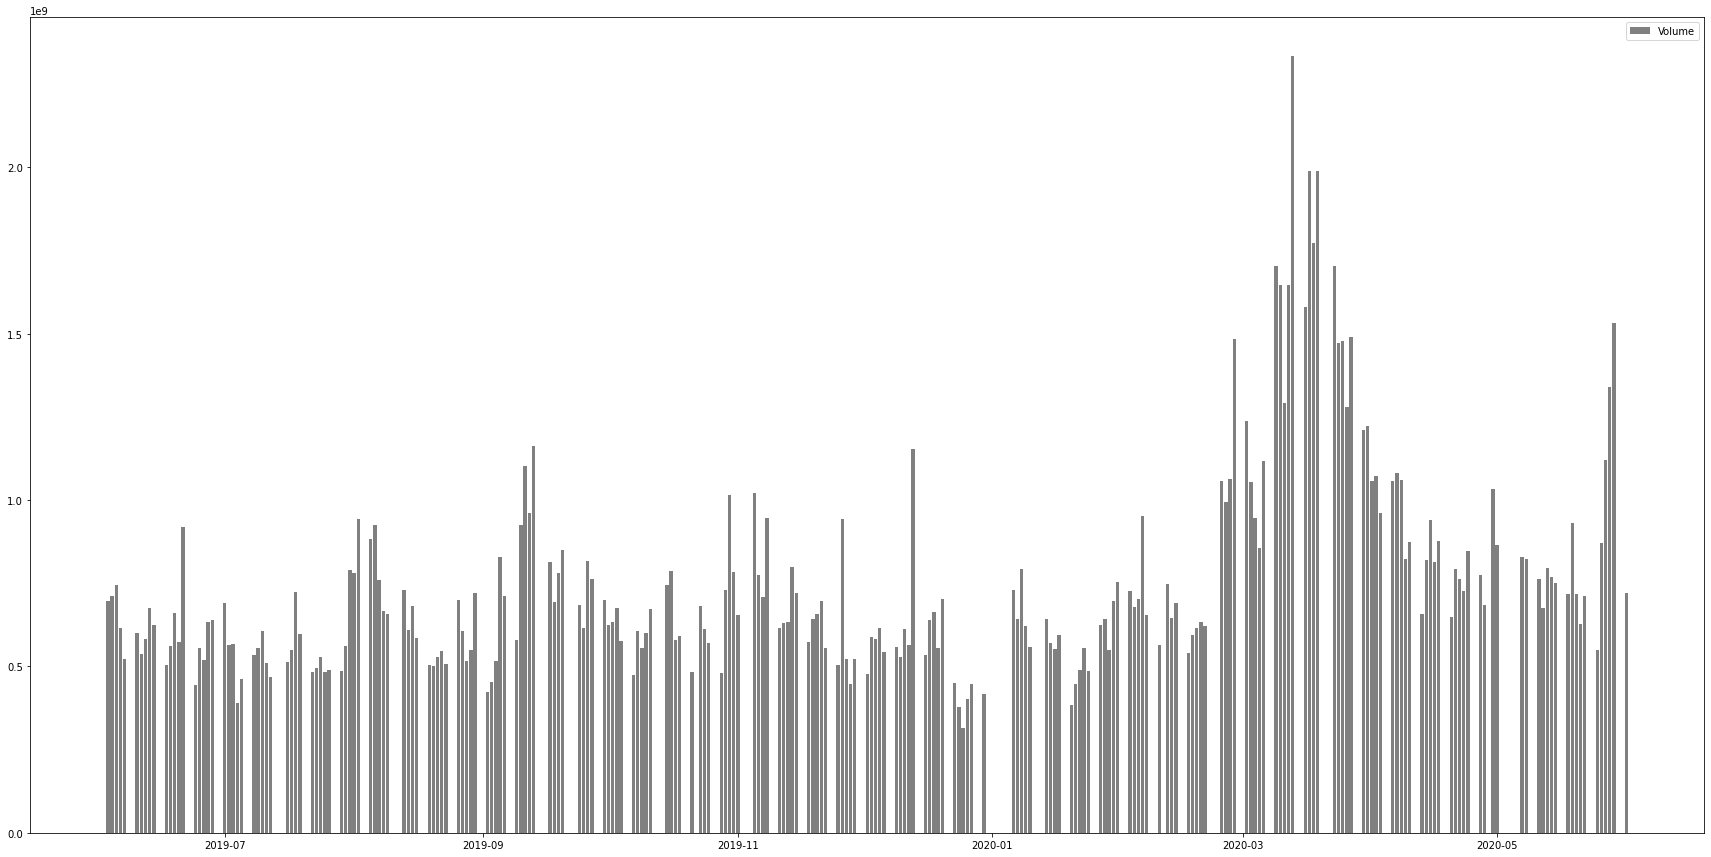

In [109]:
plt.figure(figsize=(30, 15))
plt.bar(date,df['Volume'],label='Volume',color='grey')

plt.legend()

#配色の参考サイト
#https://colorhunt.co/palette/184189

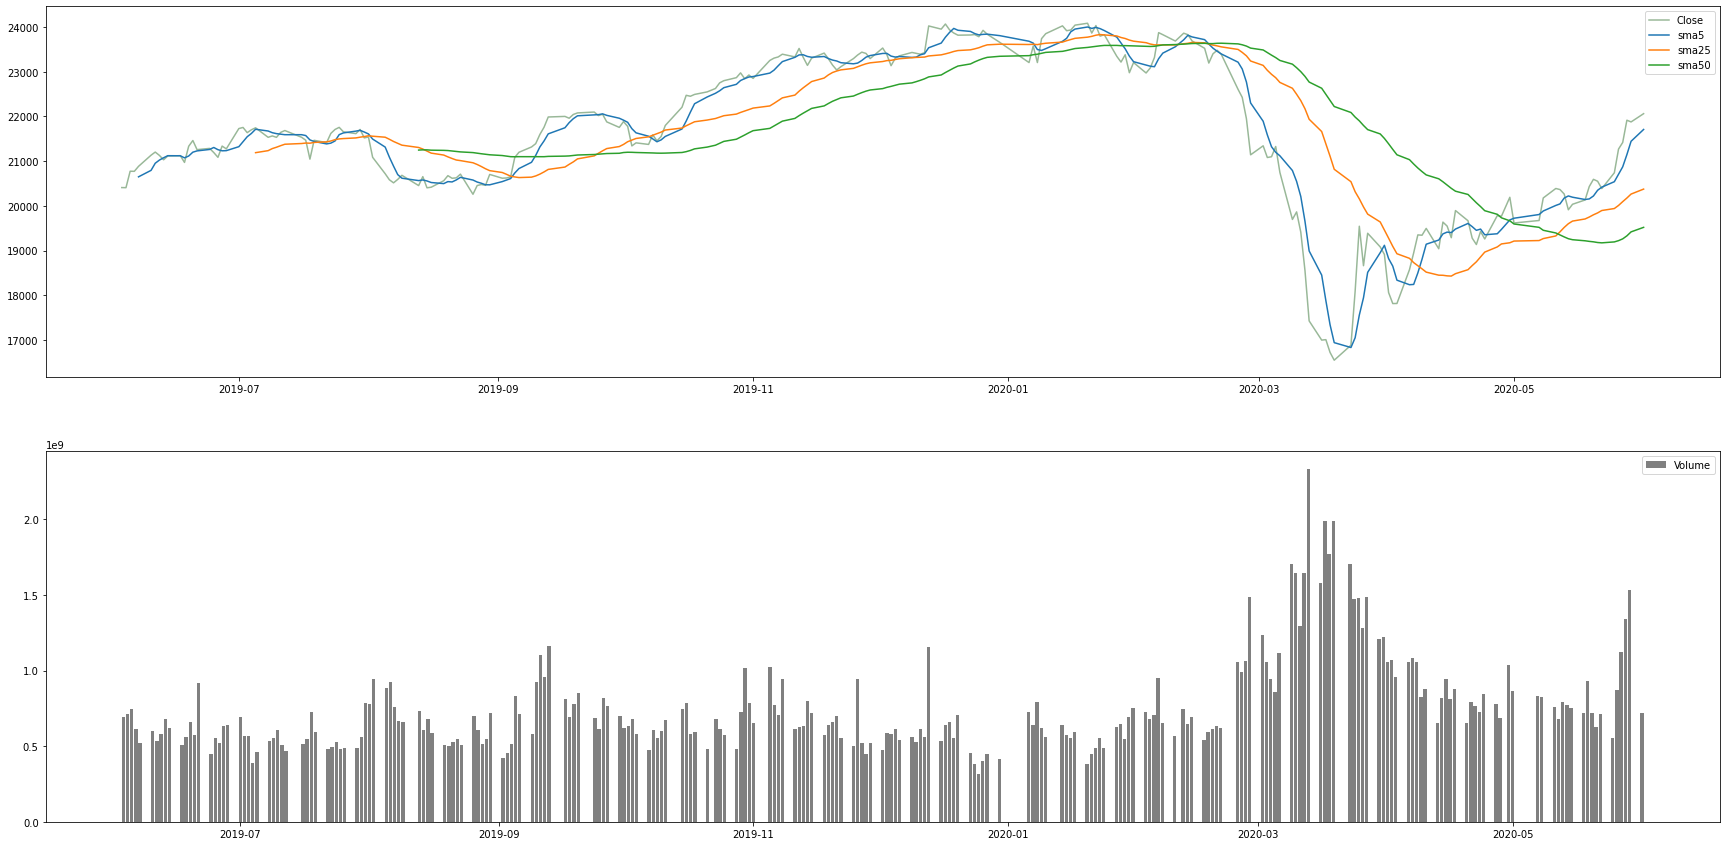

In [111]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,price,label='Close',color='#99b898')
plt.plot(date,df['sma5'],label='sma5')
plt.plot(date,df['sma25'],label='sma25')
plt.plot(date,df['sma50'],label='sma50')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [112]:
#リクルートホールディングス
df = data.DataReader('6098.JP', 'stooq') # 証券コードを使用

In [124]:
print('■ 最小値と最大値')
print(df.index.min())
print(f'{df.index.max()}\n')
print('■ データを確認')
print(df.head())
print(df.tail())

■ 最小値と最大値
2017-01-25 00:00:00
2022-01-21 00:00:00

■ データを確認
               Open     High      Low    Close   Volume
Date                                                   
2017-01-25  1644.77  1670.93  1634.97  1648.05  5027015
2017-01-26  1648.05  1648.05  1618.63  1625.17  5456993
2017-01-27  1633.32  1633.32  1610.45  1618.63  4923343
2017-01-30  1620.26  1626.80  1613.72  1623.51  3534629
2017-01-31  1610.45  1630.06  1608.81  1616.97  3171930
              Open    High     Low   Close   Volume
Date                                               
2022-01-17  6144.0  6165.0  6033.0  6115.0  3035800
2022-01-18  6144.0  6307.0  6117.0  6134.0  4151600
2022-01-19  6045.0  6129.0  5939.0  5987.0  4758200
2022-01-20  5951.0  6164.0  5902.0  6146.0  4863100
2022-01-21  5980.0  6048.0  5923.0  6019.0  4215400


In [125]:
# フレームワークのインデックスの並び替え
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-25,1644.77,1670.93,1634.97,1648.05,5027015
2017-01-26,1648.05,1648.05,1618.63,1625.17,5456993
2017-01-27,1633.32,1633.32,1610.45,1618.63,4923343
2017-01-30,1620.26,1626.80,1613.72,1623.51,3534629
2017-01-31,1610.45,1630.06,1608.81,1616.97,3171930


In [127]:
# 期間を設定する
df.index>='2019-06-01 00:00:00'
df[df.index>='2019-06-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,3406.33,3457.75,3388.53,3457.75,3490685
2019-06-04,3449.84,3449.84,3254.05,3258.00,7016666
2019-06-05,3314.36,3387.53,3303.49,3387.53,5071631
2019-06-06,3358.87,3375.67,3324.27,3333.16,4992442
2019-06-07,3365.78,3375.67,3312.39,3336.13,2585019
2019-06-10,3379.63,3453.80,3368.76,3439.95,4307757
2019-06-11,3421.16,3457.75,3399.41,3451.82,2509671
2019-06-12,3462.69,3512.13,3417.21,3420.17,4282170
2019-06-13,3384.58,3476.52,3382.60,3438.96,3208113


In [128]:
df.index<='2020-05-01 00:00:00'
df[df.index<='2020-05-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-25,1644.77,1670.93,1634.97,1648.05,5027015
2017-01-26,1648.05,1648.05,1618.63,1625.17,5456993
2017-01-27,1633.32,1633.32,1610.45,1618.63,4923343
2017-01-30,1620.26,1626.80,1613.72,1623.51,3534629
2017-01-31,1610.45,1630.06,1608.81,1616.97,3171930
2017-02-01,1615.35,1680.74,1612.07,1674.21,7010236
2017-02-02,1687.29,1690.55,1651.31,1654.60,4379907
2017-02-03,1661.13,1693.83,1657.84,1661.13,4291526
2017-02-06,1667.67,1687.29,1657.84,1684.01,3455423


In [134]:
df[(df.index>='2019-06-01 00:00:00') & (df.index<='2020-05-01 00:00:00')]
df = df[(df.index>='2019-06-01 00:00:00') & (df.index<='2020-06-01 00:00:00')]

In [139]:
def company_stock(start,end,company_code):
    df = data.DataReader(company_code, 'stooq')
    df = df[(df.index>=start) & (df.index<=end)]

    date=df.index
    price=df['Close']

    span01=5
    span02=25
    span03=50

    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()

    plt.figure(figsize=(20, 10))
    plt.subplot(2,1,1)

    plt.plot(date,price,label='Close')
    plt.plot(date,df['sma01'],label='sma01')
    plt.plot(date,df['sma02'],label='sma02')
    plt.plot(date,df['sma03'],label='sma03')
    plt.legend()

    plt.subplot(2,1,2)
    plt.bar(date,df['Volume'],label='Volume',color='grey')
    plt.legend()

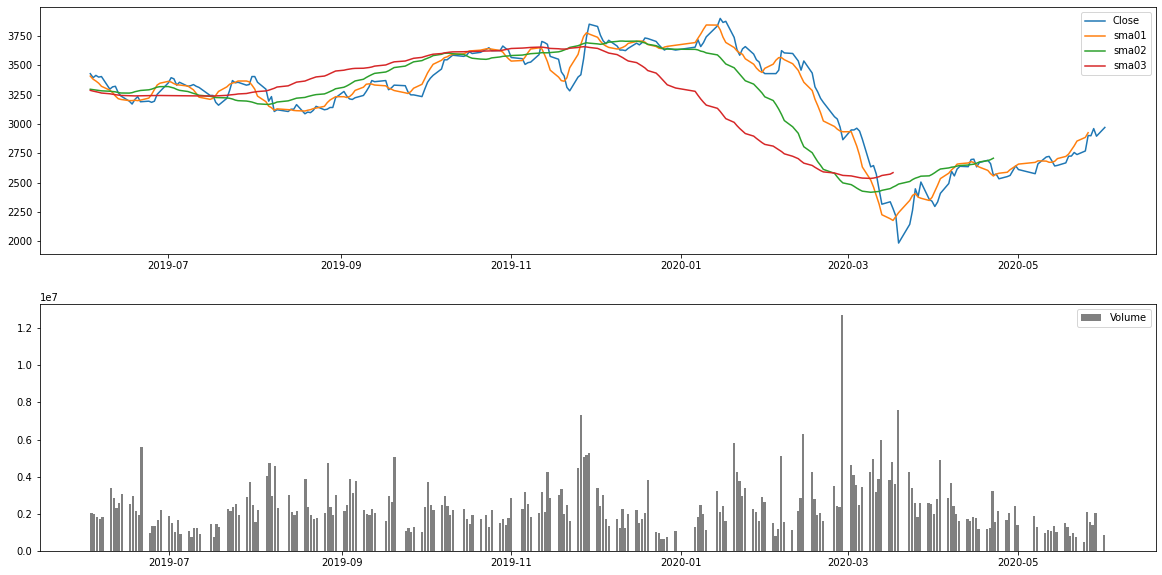

In [140]:
company_stock('2019-06-01','2020-06-01','6502.JP')

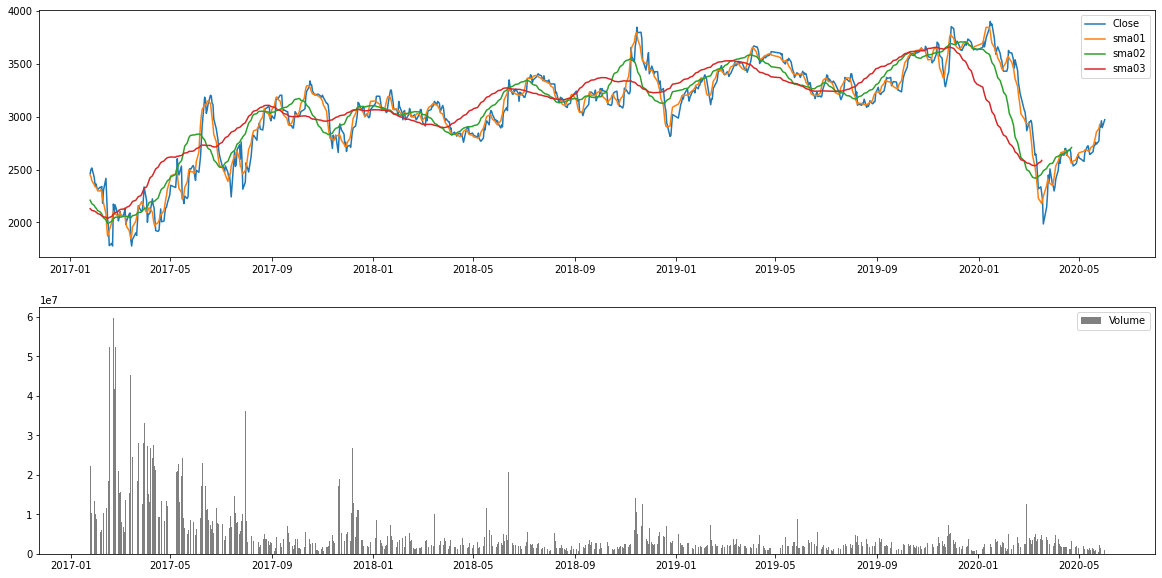

In [141]:
company_stock('2017-01-01','2020-06-01','6502.JP')

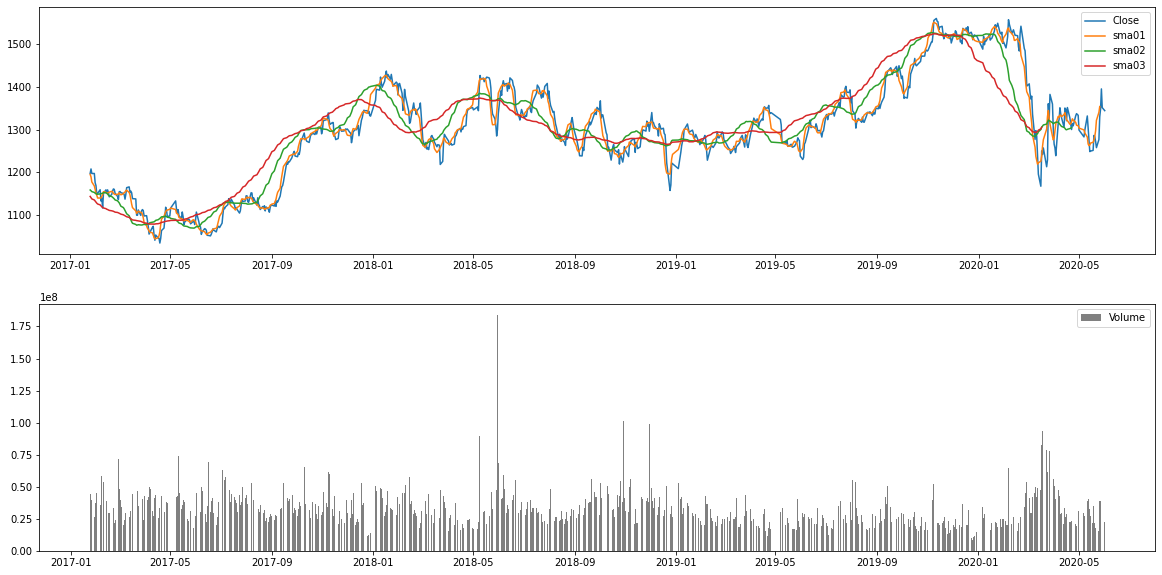

In [142]:
company_stock('2017-01-01','2020-06-01','7203.jp')